In this notebook, we will write a complete pipeline for **training a model to obtain node embeddings**.

To begin, we will again work with the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will compute several statistics for this graph and then transform its structure into a PyTorch tensor.

Next, we will implement a training algorithm for graphs: a model for obtaining node embeddings.

We will also explore graph kernels.

In [1]:
import networkx as nx

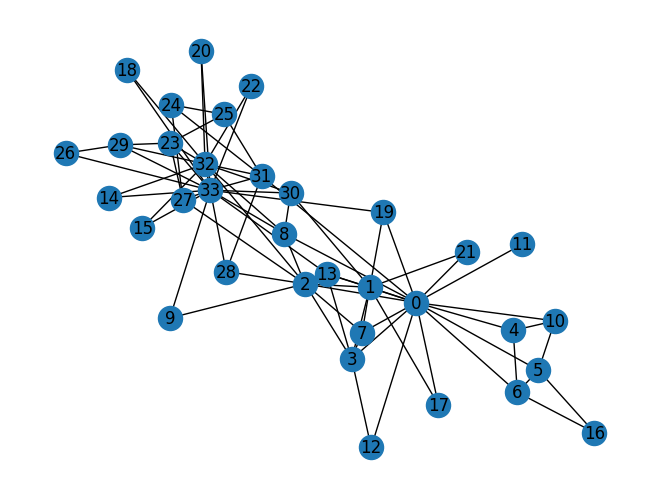

In [2]:
G = nx.karate_club_graph()

# Visualize the graph
nx.draw(G, with_labels = True)

**Average node degree**

In [3]:
def average_degree(num_edges, num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of 
    # the graph. Round the result to nearest integer

    avg_degree = 0

    ############# Your code here ############

    #########################################
    
    avg_degree = round(2 * num_edges / num_nodes)

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


__Average clustering coefficient__

In [4]:
def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0

    ############# Your code here ############
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function

    avg_cluster_coef = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

    return avg_cluster_coef, nx.algorithms.average_clustering(G)

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is (0.563, 0.5706384782076823)


__Сloseness centrality__

$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [5]:
def closeness_centrality(G, node=5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0

    ## Note:
    ## 1: You can use networkx closeness centrality function.
    ## 2: Notice that networkx closeness centrality returns the normalized 
    ## closeness directly, which is different from the raw (unnormalized) 
    ## one that we learned in the lecture.

    #########################################

    closeness = nx.centrality.closeness_centrality(G, node)

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.38372093023255816


### Link prediction

__Jaccard coefficient__

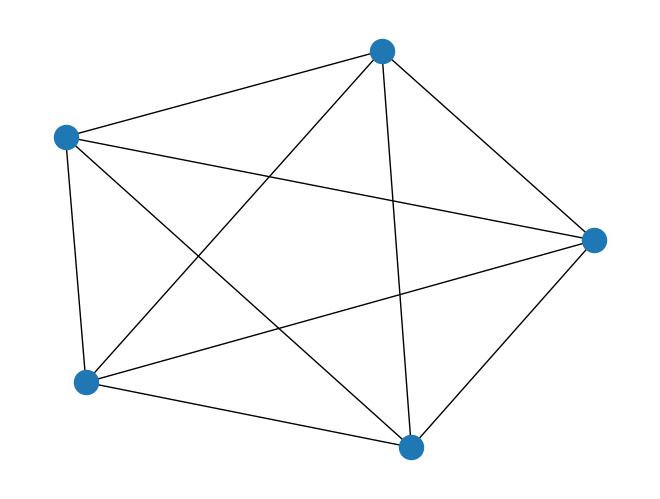

In [6]:
G = nx.complete_graph(5)

nx.draw(G)

In [7]:
preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
for u, v, p in preds:
     print('(%d, %d) -> %.8f' % (u, v, p))

(0, 1) -> 0.60000000
(2, 3) -> 0.60000000


__Common neighbors__

In [8]:
sorted(nx.common_neighbors(G, 0, 1))

[2, 3, 4]

In [9]:
preds = nx.common_neighbor_centrality(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p}")

(0, 1) -> 3.4000000000000004
(2, 3) -> 3.4000000000000004


__Adamic-Adar index__

In [10]:
preds = nx.adamic_adar_index(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 1) -> 2.16404256
(2, 3) -> 2.16404256


## Converting the graph to a PyTorch tensor

In [11]:
import torch

G = nx.karate_club_graph()

### Tensors in PyTorch

In [12]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.7740, 0.1401, 0.2236, 0.0383],
        [0.2214, 0.1127, 0.4470, 0.3565],
        [0.0992, 0.0829, 0.5136, 0.3661]])
torch.Size([3, 4])


In [13]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


Retrieve the list of graph edges and convert it into a `torch.LongTensor`.

In [14]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.

    edge_list = list(G.edges())

    ############# Your code here ############

    #########################################

    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].

    edge_index = torch.tensor([])

    ############# Your code here ############

    #########################################


    edge_index = torch.tensor(edge_list, dtype=torch.long).permute((1, 0))

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))

The pos_edge_index tensor has shape torch.Size([2, 78])


Let's sample negative edges.

In [15]:
import random


def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation 
    # works on the karate club network. In this implementation, self loops should 
    # not be considered as either a positive or negative edge.

    neg_edge_list = []

    ############# Your code here ############

    #########################################

    pos_set = set(G.edges())
    visited_set = set()

    # G_new = random.shuffle([i for i in G.nodes()])
    
    for n_i in G.nodes():
        for n_j in G.nodes():
            if n_i == n_j or (n_i, n_j) in pos_set or (n_j, n_i) in pos_set or (n_i, n_j) in visited_set or (n_j, n_i) in visited_set:
                continue
            neg_edge_list.append((n_i, n_j))
            visited_set.add((n_i, n_j))
            visited_set.add((n_j, n_i))
            if len(visited_set) == num_neg_samples:
                break

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge

#########################################

The neg_edge_index tensor has shape torch.Size([2, 483])


## Training Node Embeddings

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [18]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 2.4157,  0.6246,  2.0554,  0.7270,  0.3221,  1.4050, -0.6588,  0.9379]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 2.4157,  0.6246,  2.0554,  0.7270,  0.3221,  1.4050, -0.6588,  0.9379],
        [ 0.1095,  0.5410, -0.3783, -0.7159,  0.9764,  0.4787,  0.4756, -0.0542]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


### Creating the Node Embedding Matrix  
- We want to obtain a **16-dimensional** vector for each node in the Karate Club graph.  
- We will initialize the matrix with a **uniform distribution** in the range \([0, 1)\). This can be done using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [19]:
# Please do not change / reset the random seed
torch.manual_seed(42)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change 
    # the values of num_node and embedding_dim. The weight matrix of returned 
    # layer should be initialized under uniform distribution. 

    emb = torch.nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)

    ############# Your code here ############

    #########################################

    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624],
        [-0.9138, -0.6581,  0.0780,  0.5258, -0.4880,  1.1914, -0.8140, -0.7360,
         -1.4032,  0.0360, -0.0635,  0.6756, -0.0978,  1.8446, -1.1845,  1.3835]],
       grad_fn=<EmbeddingBackward0>)


### Visualizing Embeddings Using PCA

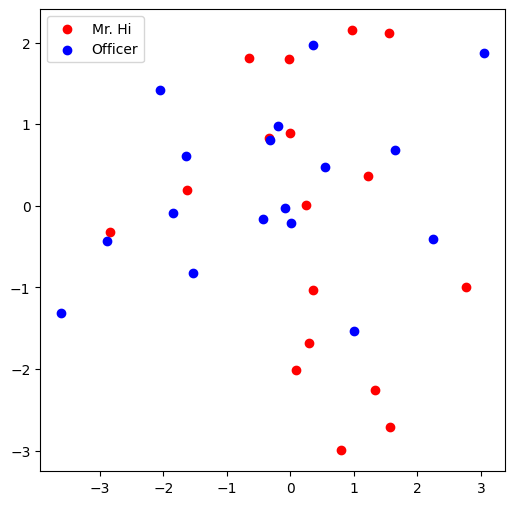

In [20]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()


visualize_emb(emb)

### Now Let's Move on to Training  

We want to optimize the embeddings for the task of classifying edges as positive or negative. By taking the edges and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid function, should yield the probability of whether an edge is positive or negative.

torch.Size([2, 78])
torch.Size([2, 561])


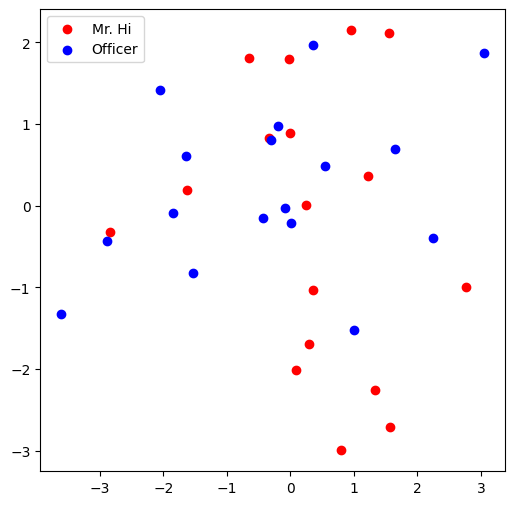

1.6089497804641724 0.5152
1.605735182762146 0.5152
1.59966242313385 0.5152
1.5910447835922241 0.5152
1.5802123546600342 0.5169
1.5674450397491455 0.5187
1.5530142784118652 0.5205
1.537179708480835 0.5223
1.5201672315597534 0.5223
1.502190113067627 0.5241
1.4834353923797607 0.5241
1.4640833139419556 0.5294
1.4442790746688843 0.5312
1.4241644144058228 0.5348
1.4038622379302979 0.5365
1.383480191230774 0.5383
1.3631069660186768 0.5401
1.3428295850753784 0.5419
1.3227142095565796 0.5455
1.3028216361999512 0.549
1.283203363418579 0.5508
1.2638999223709106 0.5526
1.2449474334716797 0.5579
1.2263734340667725 0.5615
1.2081979513168335 0.5651
1.190440058708191 0.5668
1.1731104850769043 0.5722
1.1562182903289795 0.574
1.139768362045288 0.5758
1.1237608194351196 0.5775
1.1081960201263428 0.5793
1.093070387840271 0.5847
1.0783799886703491 0.5847
1.0641175508499146 0.5847
1.050275444984436 0.5865
1.036846399307251 0.5847
1.0238193273544312 0.5829
1.0111863613128662 0.5882
0.9989351034164429 0.5882


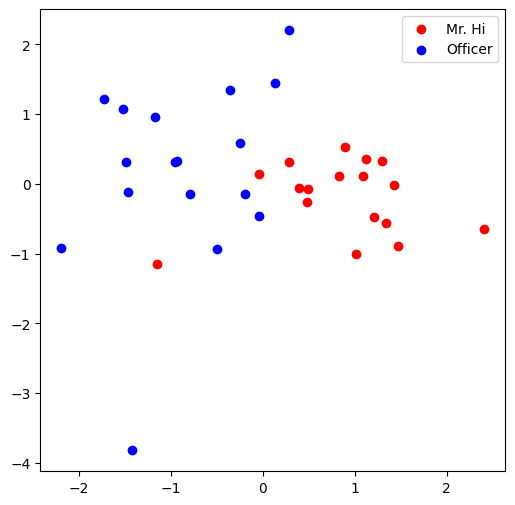

0.6412867307662964 0.6952
0.6386814713478088 0.7005
0.6361219882965088 0.7005
0.633607029914856 0.7023
0.631135106086731 0.7023
0.6287053823471069 0.7041
0.6263167858123779 0.7023
0.6239679455757141 0.7041
0.6216580867767334 0.697
0.6193860769271851 0.697
0.6171509027481079 0.7005
0.6149519085884094 0.7005
0.6127877235412598 0.7023
0.6106579899787903 0.7023
0.6085614562034607 0.7041
0.6064975261688232 0.7023
0.6044653058052063 0.7023
0.6024640798568726 0.7059
0.6004930734634399 0.7077
0.5985515713691711 0.7094
0.5966389179229736 0.7094
0.5947542786598206 0.7077
0.5928972363471985 0.7077
0.5910670757293701 0.7094
0.5892630815505981 0.7112
0.5874846577644348 0.7112
0.5857313275337219 0.7094
0.5840024948120117 0.7094
0.5822975635528564 0.7077
0.5806159973144531 0.7059
0.5789573788642883 0.7041
0.5773211121559143 0.7059
0.5757067799568176 0.7059
0.5741137862205505 0.7059
0.5725418329238892 0.7059
0.5709903240203857 0.7059
0.5694588422775269 0.7077
0.5679470896720886 0.7059
0.56645452976226

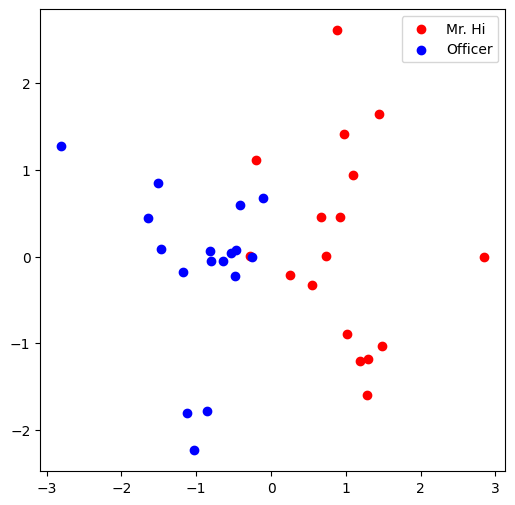

0.4993995428085327 0.7522
0.49859532713890076 0.7576
0.49779701232910156 0.7576
0.4970046579837799 0.7594
0.4962180554866791 0.7611
0.4954371452331543 0.7611
0.49466174840927124 0.7629
0.49389195442199707 0.7629
0.49312761425971985 0.7647
0.49236857891082764 0.7629
0.4916149079799652 0.7611
0.49086642265319824 0.7594
0.49012306332588196 0.7594
0.48938482999801636 0.7611
0.4886516034603119 0.7629
0.487923264503479 0.7629
0.4871998727321625 0.7611
0.4864811897277832 0.7611
0.48576727509498596 0.7611
0.485058069229126 0.7629
0.48435351252555847 0.7629
0.4836535155773163 0.7629
0.48295795917510986 0.7629
0.4822668433189392 0.7665
0.4815801680088043 0.7683
0.48089784383773804 0.7683
0.4802197217941284 0.7683
0.479545921087265 0.7701
0.47887617349624634 0.7701
0.47821059823036194 0.7718
0.47754913568496704 0.7718
0.47689172625541687 0.7718
0.4762381613254547 0.7736
0.4755885899066925 0.7736
0.4749429523944855 0.7736
0.4743010401725769 0.7736
0.47366300225257874 0.7754
0.4730287194252014 0.77

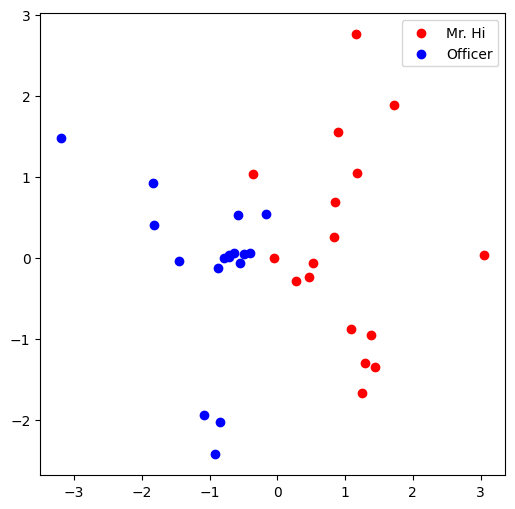

0.4391315281391144 0.8093
0.43867117166519165 0.8093
0.43821272253990173 0.8093
0.4377562701702118 0.8111
0.43730178475379944 0.8111
0.43684911727905273 0.8093
0.43639838695526123 0.8093
0.43594956398010254 0.8093
0.4355025291442871 0.8111
0.4350574016571045 0.8111
0.4346141219139099 0.8111
0.4341726005077362 0.8111
0.43373289704322815 0.8111
0.43329495191574097 0.8111
0.43285879492759705 0.8111
0.4324244260787964 0.8111
0.43199172616004944 0.8111
0.43156081438064575 0.8128
0.43113160133361816 0.8128
0.4307039976119995 0.8128
0.43027815222740173 0.8128
0.4298539459705353 0.8111
0.42943137884140015 0.8111
0.42901045083999634 0.8128
0.42859116196632385 0.8128
0.4281734824180603 0.8128
0.4277573823928833 0.8164
0.42734286189079285 0.8182
0.42692992091178894 0.8182
0.4265184998512268 0.8182
0.4261086583137512 0.8182
0.4257003366947174 0.8182
0.425293505191803 0.8182
0.4248881936073303 0.8182
0.42448440194129944 0.8182
0.42408204078674316 0.8182
0.4236811399459839 0.8182
0.423281729221344 0

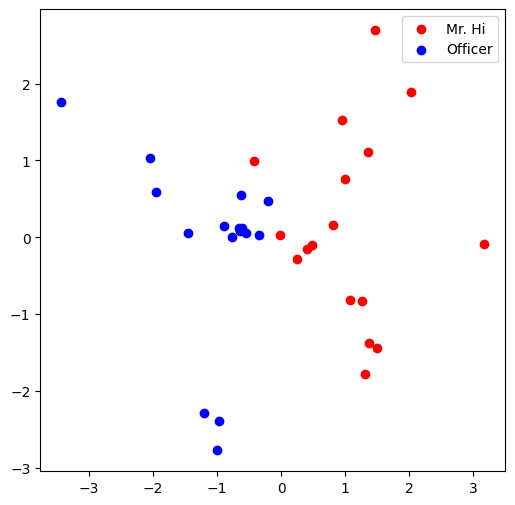

0.40059342980384827 0.836
0.4002664089202881 0.836
0.39994025230407715 0.836
0.39961501955986023 0.836
0.39929062128067017 0.836
0.39896702766418457 0.836
0.398644357919693 0.836
0.3983224630355835 0.836
0.39800140261650085 0.836
0.39768120646476746 0.8378
0.39736178517341614 0.8378
0.39704322814941406 0.8378
0.39672547578811646 0.8396
0.3964085280895233 0.8414
0.39609232544898987 0.8414
0.39577698707580566 0.8414
0.39546239376068115 0.8414
0.3951486051082611 0.8414
0.39483556151390076 0.8431
0.3945232927799225 0.8431
0.3942117691040039 0.8431
0.3939010202884674 0.8431
0.393591046333313 0.8431
0.39328181743621826 0.8431
0.39297327399253845 0.8431
0.3926655054092407 0.8449
0.3923585116863251 0.8449
0.39205220341682434 0.8449
0.3917466402053833 0.8449
0.3914417624473572 0.8449
0.39113759994506836 0.8449
0.39083415269851685 0.8449
0.39053142070770264 0.8449
0.39022937417030334 0.8449
0.38992801308631897 0.8449
0.3896273374557495 0.8449
0.3893273174762726 0.8449
0.38902798295021057 0.8467


In [21]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.

    accu = 0.0

    ############# Your code here ############

    #########################################

    accu = round(((torch.round(pred) == label).sum()/label.size(0)).item(), 4)

    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (6) Update the embeddings using the loss and optimizer 
    # (as a sanity check, the loss should decrease during training)

    epochs = 500
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):
        optimizer.zero_grad()

        product = torch.sum(torch.mul(emb(train_edge[0]), emb(train_edge[1])), axis=1)
        pred = torch.sigmoid(product)
        loss = loss_fn(pred, train_label)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            acc = accuracy(pred, train_label)
            if i % 100 == 0:
                visualize_emb(emb)
            print(loss.item(), acc)

    ############# Your code here ############
    
#########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

### Now, Let's Visualize the Trained Embeddings  
As we can see, the classes are now more clearly separated.

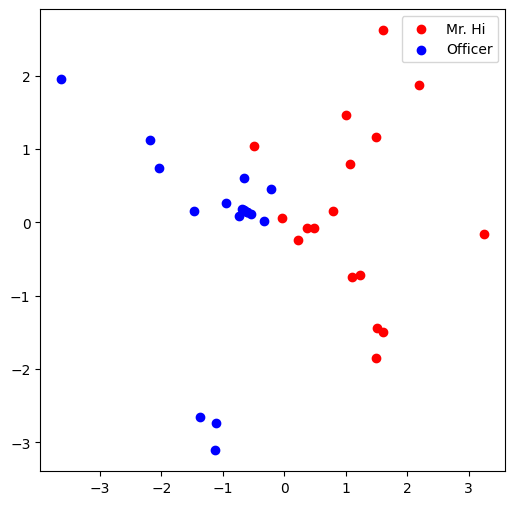

In [22]:
visualize_emb(emb)

## Approaches with Graph Kernels

### Counting Graphlets of a Given Length

In [23]:
g = nx.Graph()
g.add_edge(1,2);g.add_edge(1,3)
g.add_edge(1,7);g.add_edge(2,4)
g.add_edge(3,4);g.add_edge(3,5)
g.add_edge(3,6);g.add_edge(4,5)
g.add_edge(5,6);g.add_edge(6,7)

import itertools

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)

for sub_nodes in itertools.combinations(g.nodes(),len(target.nodes())):
    subg = g.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print(subg.edges())

[(1, 2), (1, 3)]
[(1, 2), (1, 7)]
[(1, 2), (2, 4)]
[(1, 3), (1, 7)]
[(1, 3), (3, 4)]
[(1, 3), (3, 5)]
[(1, 3), (3, 6)]
[(1, 7), (6, 7)]
[(2, 4), (3, 4)]
[(2, 4), (4, 5)]
[(3, 6), (6, 7)]
[(3, 4), (3, 6)]
[(5, 6), (6, 7)]
[(4, 5), (5, 6)]


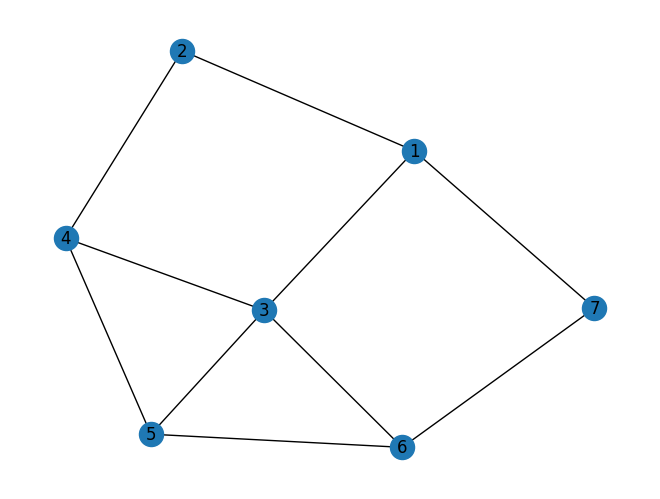

In [24]:
nx.draw(g, with_labels=True)

### Now, Let's Train a Model on Graph Kernels

In [25]:
import networkx as nx
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [26]:
# Generate simple dataset
def create_dataset():
    Gs = [nx.cycle_graph(i) for i in range(3, 103)]
    Gs.extend([nx.path_graph(i) for i in range(3, 103)])
    y = [0 if i < 100 else 1 for i in range(200)]

    return Gs, y

In [27]:
Gs, y = create_dataset()
G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)

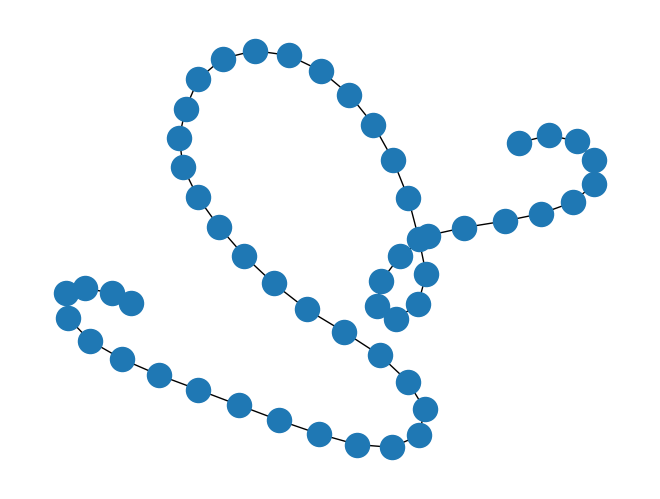

In [28]:
nx.draw(Gs[150])

In [29]:
# Compute the shortest path kernel
def shortest_path_kernel(Gs_train, Gs_test):
    all_paths = dict()
    sp_counts_train = dict()

    for i, G in enumerate(Gs_train):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_train[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_train[i]:
                        sp_counts_train[i][length] += 1
                    else:
                        sp_counts_train[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    sp_counts_test = dict()

    for i, G in enumerate(Gs_test):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_test[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_test[i]:
                        sp_counts_test[i][length] += 1
                    else:
                        sp_counts_test[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi_train = np.zeros((len(G_train), len(all_paths)))
    for i in range(len(G_train)):
        for length in sp_counts_train[i]:
            phi_train[i, all_paths[length]] = sp_counts_train[i][length]

    phi_test = np.zeros((len(Gs_test), len(all_paths)))
    for i in range(len(Gs_test)):
        for length in sp_counts_test[i]:
            phi_test[i, all_paths[length]] = sp_counts_test[i][length]

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [30]:
# Compute the graphlet kernel
def graphlet_kernel(Gs_train, Gs_test, n_samples=200):
    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]

    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0, 1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0, 1)
    graphlets[2].add_edge(1, 2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0, 1)
    graphlets[3].add_edge(1, 2)
    graphlets[3].add_edge(0, 2)

    phi_train = np.zeros((len(G_train), 4))

    for i, graph in enumerate(Gs_train):
        for j in range(n_samples):
            rnd_set = np.random.choice(graph.nodes(), 3)
            sub_g = graph.subgraph(rnd_set)
            phi_train[i] += np.array([nx.is_isomorphic(g, sub_g) for g in graphlets])

    phi_test = np.zeros((len(G_test), 4))

    for i, graph in enumerate(Gs_test):
        for j in range(n_samples):
            rnd_set = np.random.choice(graph.nodes(), 3)
            sub_g = graph.subgraph(rnd_set)
            phi_test[i] += np.array([nx.is_isomorphic(g, sub_g) for g in graphlets])


    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [31]:
K_train_sp, K_test_sp = shortest_path_kernel(G_train, G_test)

K_train_gk, K_test_gk = graphlet_kernel(G_train, G_test, 500)

model = SVC(kernel='precomputed')
print("Starting Training for the Graphlet")
model.fit(K_train_gk, y_train)
y_pred = model.predict(K_test_gk)
print("Accuracy for Graphlet", accuracy_score(y_test, y_pred))

model = SVC(kernel='precomputed')
print("Starting Training for the Shortest Path")
model.fit(K_train_sp, y_train)
y_pred = model.predict(K_test_sp)
print("Accuracy for Shortest Path", accuracy_score(y_test, y_pred))

Starting Training for the Graphlet
Accuracy for Graphlet 0.45
Starting Training for the Shortest Path
Accuracy for Shortest Path 1.0
